In [57]:
import numpy as np
import matplotlib.pyplot as plt

In this example, we calculate the discrete Fourier transform for a signal formed by the superposition of two cosine signals with different frequencies:
$$f_1(t)=\cos(2\pi \cdot f_1 \cdot t)$$
$$f_2(t)=\cos(2\pi \cdot f_2 \cdot t)$$
$$signal(t)=f_1(t)+f_2(t)$$

In [58]:
f1 = 4 # First signal frequency
f2 = 25 # Second signal frequency

sample_freq = 100 # Sample frequency, (number of points or samples per time unit)
dt = 1 / sample_freq # Time between point in the signal

t_start = 0 # Start time of the signal
t_end = 1 # Final time of the signal

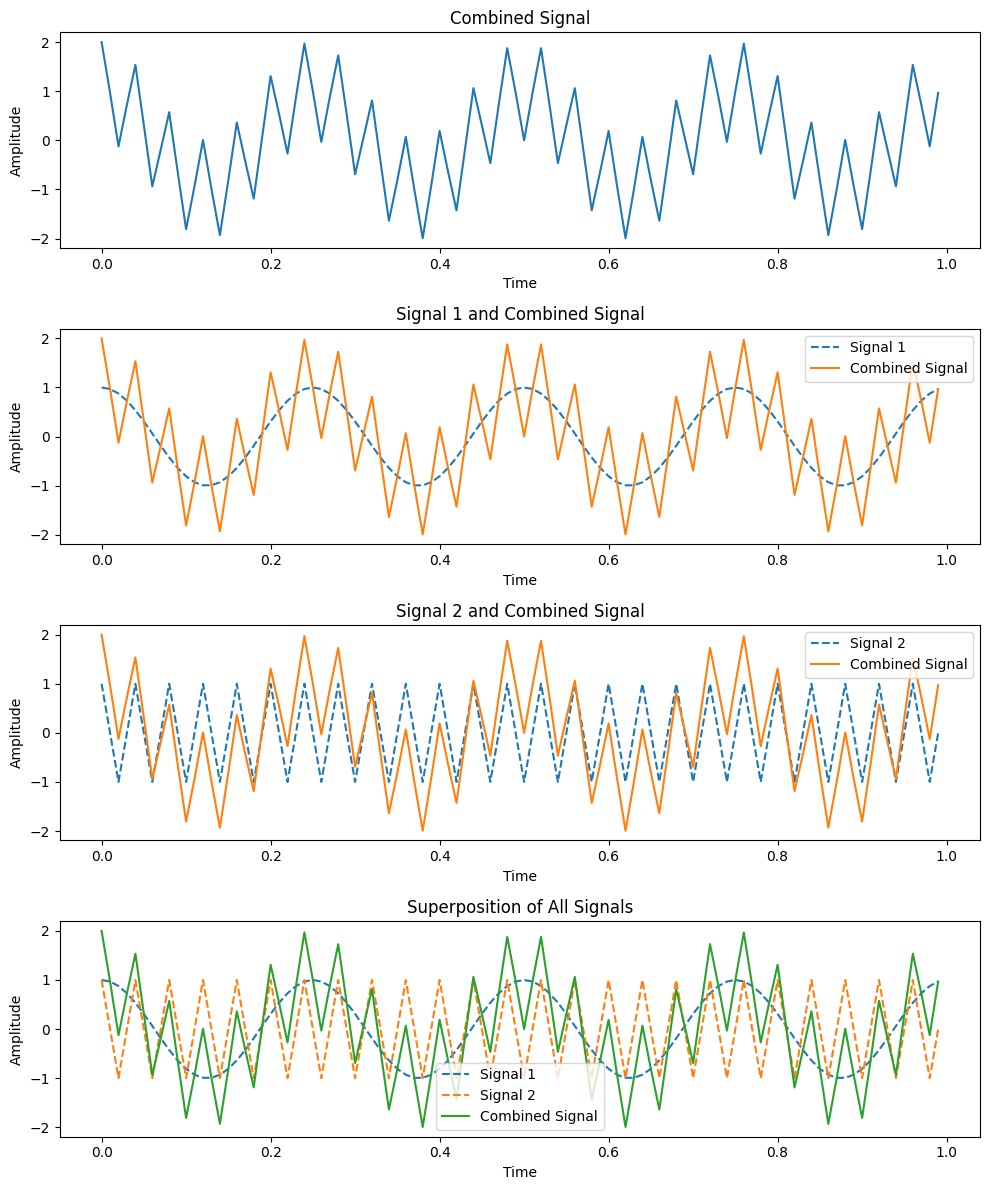

In [59]:
# Signal points
time = np.arange(t_start, t_end, dt)  # Time vector
signal1 = np.cos(2*np.pi*f1*time)
signal2 = np.cos(2*np.pi*f2*time)
signal_combined = np.cos(2*np.pi*f1*time) + np.cos(2*np.pi*f2*time)

# Creating figure
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# First graph: combined signal
axs[0].plot(time, signal_combined, '-')
axs[0].set_title('Combined Signal')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

# Second graph: signal1 and combined signal
axs[1].plot(time, signal1, '--', label='Signal 1')
axs[1].plot(time, signal_combined, '-', label='Combined Signal')
axs[1].set_title('Signal 1 and Combined Signal')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Third graph: signal2 and combined signal
axs[2].plot(time, signal2, '--', label='Signal 2')
axs[2].plot(time, signal_combined, '-', label='Combined Signal')
axs[2].set_title('Signal 2 and Combined Signal')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

# Fourth graph: superposition of all signals
axs[3].plot(time, signal1, '--', label='Signal 1')
axs[3].plot(time, signal2, '--', label='Signal 2')
axs[3].plot(time, signal_combined, '-', label='Combined Signal')
axs[3].set_title('Superposition of All Signals')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].legend()

# Show the graph
plt.tight_layout()
plt.show()

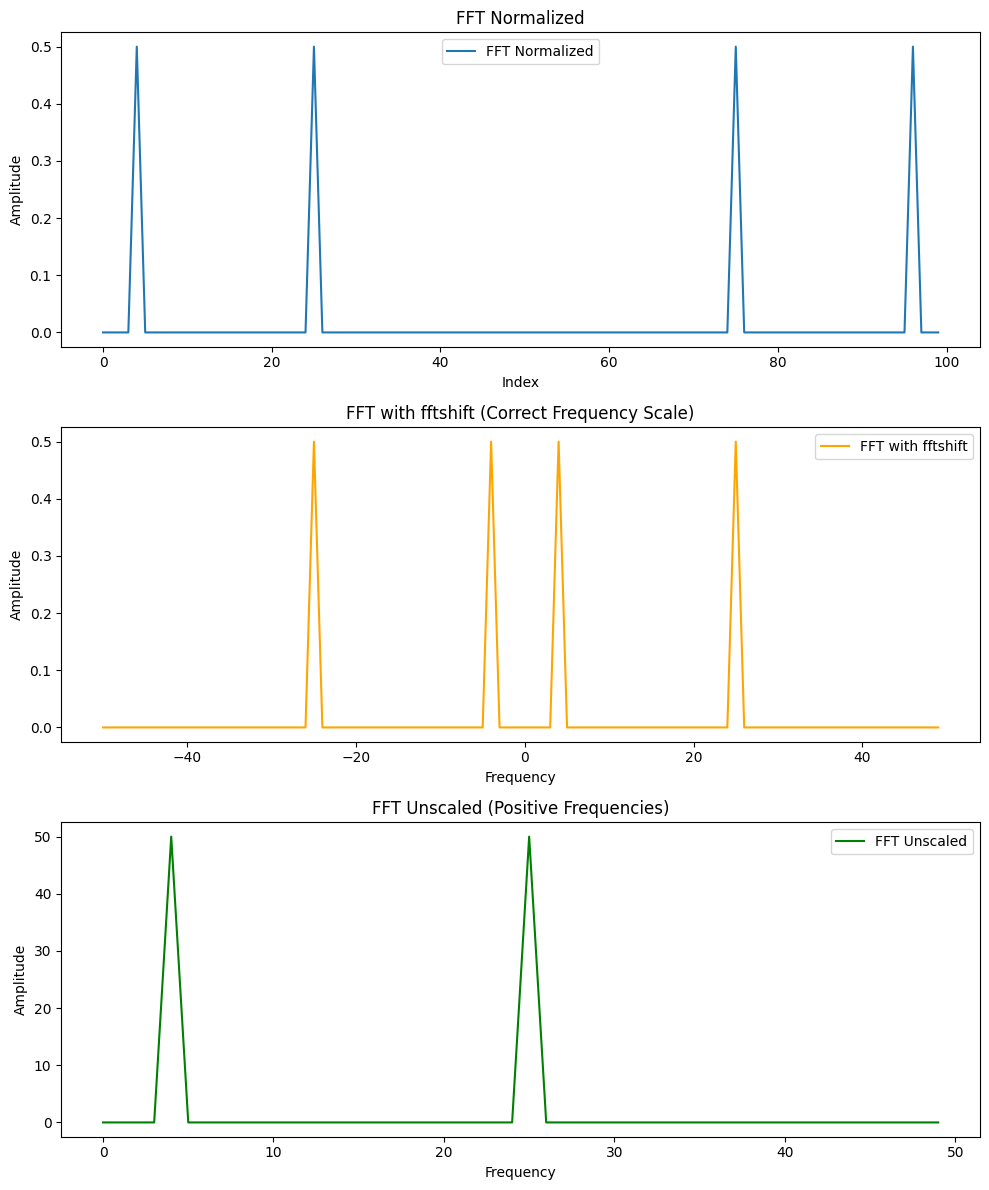

In [60]:
# Fourier Transform calculation
signal_FFT = np.fft.fft(signal_combined / len(signal_combined))  # Normalization
signal_FFT2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(signal_combined) / len(signal_combined)))

# Fourier Transform without normalization
signal_FFT_unscaled = np.fft.fft(signal_combined)
signal_FFT_unscaled = signal_FFT_unscaled[range(int(len(signal_combined) / 2))]  # Taking ONLY the positive frequencies
# Since the fft is symetrical, half of the values will be for the positive frequencies and the other half for the negative frequencies
# We only take the positive frequencies and their corresponding values

# Corresponding frequencies for unscaled FFT
indexes = np.arange(len(signal_FFT_unscaled))
time_duration = len(signal_combined) / sample_freq
frequencies = indexes / time_duration

# Frequencies for fftshift (covering negative and positive)
freqs_shifted = np.fft.fftshift(np.fft.fftfreq(len(signal_combined), d=1/sample_freq))

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# First graph: FFT with normalization
axs[0].plot(np.abs(signal_FFT), label="FFT Normalized")
axs[0].set_title('FFT Normalized')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Second graph: FFT with fftshift and correct x-axis scaling
axs[1].plot(freqs_shifted, np.abs(signal_FFT2), label="FFT with fftshift", color='orange')
axs[1].set_title('FFT with fftshift (Correct Frequency Scale)')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Third graph: FFT without normalization (positive frequencies)
axs[2].plot(frequencies, np.abs(signal_FFT_unscaled), label="FFT Unscaled", color='green')
axs[2].set_title('FFT Unscaled (Positive Frequencies)')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.tight_layout()
plt.show()


# Observe the effect of bringing the sampling frequency closer to the frequency of the signals and relate it to the Nyquist theorem.

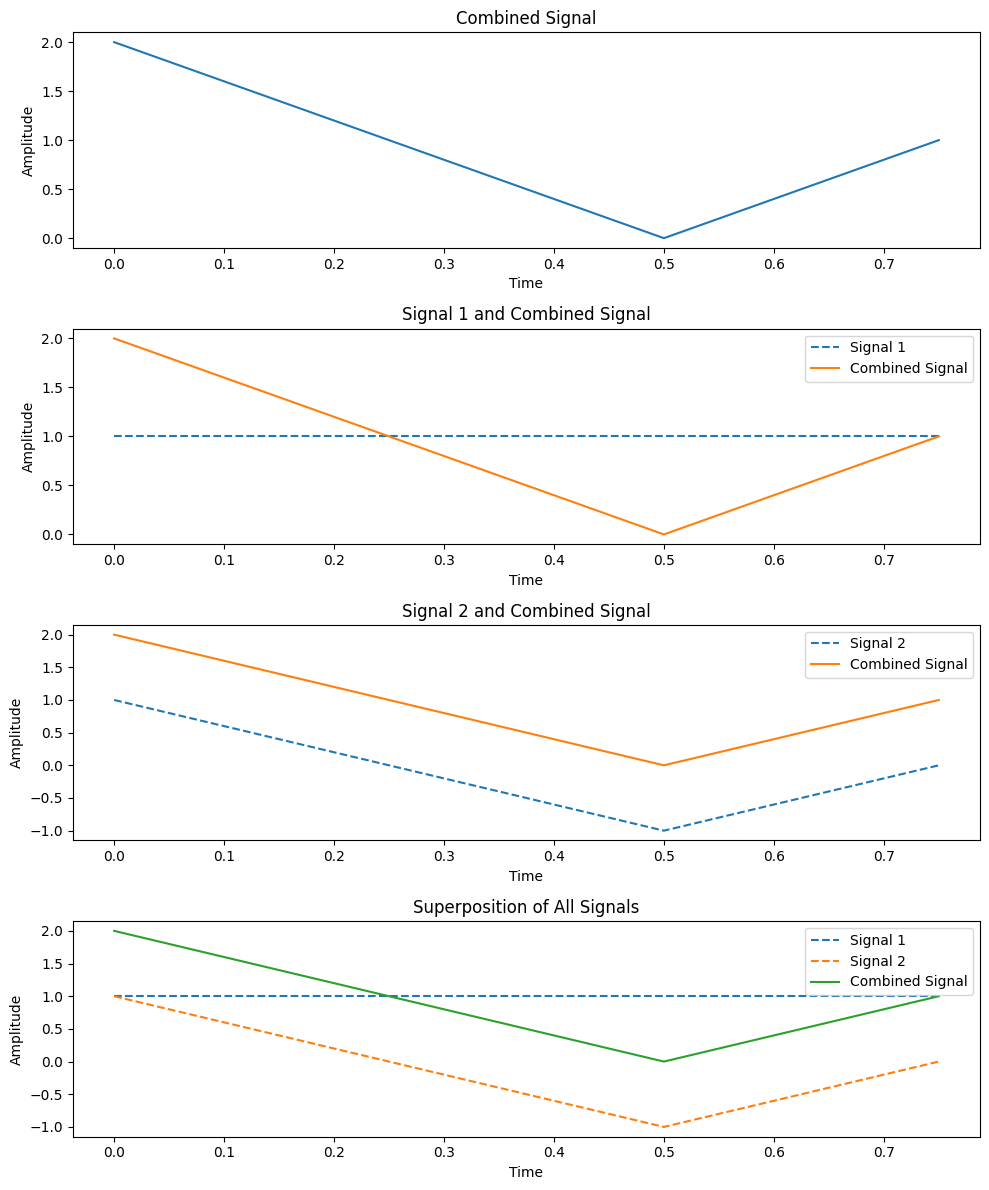

In [61]:
f1 = 4 # First signal frequency
f2 = 25 # Second signal frequency

sample_freq = 4 # Sample frequency, (number of points or samples per time unit)
dt = 1 / sample_freq # Time between point in the signal

t_start = 0 # Start time of the signal
t_end = 1 # Final time of the signal

# Signal points
time = np.arange(t_start, t_end, dt)  # Time vector
signal1 = np.cos(2*np.pi*f1*time)
signal2 = np.cos(2*np.pi*f2*time)
signal_combined = np.cos(2*np.pi*f1*time) + np.cos(2*np.pi*f2*time)

# Creating figure
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# First graph: combined signal
axs[0].plot(time, signal_combined, '-')
axs[0].set_title('Combined Signal')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

# Second graph: signal1 and combined signal
axs[1].plot(time, signal1, '--', label='Signal 1')
axs[1].plot(time, signal_combined, '-', label='Combined Signal')
axs[1].set_title('Signal 1 and Combined Signal')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Third graph: signal2 and combined signal
axs[2].plot(time, signal2, '--', label='Signal 2')
axs[2].plot(time, signal_combined, '-', label='Combined Signal')
axs[2].set_title('Signal 2 and Combined Signal')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

# Fourth graph: superposition of all signals
axs[3].plot(time, signal1, '--', label='Signal 1')
axs[3].plot(time, signal2, '--', label='Signal 2')
axs[3].plot(time, signal_combined, '-', label='Combined Signal')
axs[3].set_title('Superposition of All Signals')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].legend()

# Show the graph
plt.tight_layout()
plt.show()

It can be seen from the previous graph that when the sample_rate or sample_freq variable is lower and close to the value of the frequency, information is lost for the signals. For example, in the case when $\text{sample\_freq} = 4$, all information is lost for the Signal 1, because the number of the rate is far less than the required based on the Nyquist theorem, more than 2 times the maximun frequency of the signal.

# Repeat for the superposition of 10 cosine signals and see how the total amplitude of the transform is distributed.

2.0
24.0
46.0
68.0
90.0
112.0
134.0
156.0
178.0
200.0


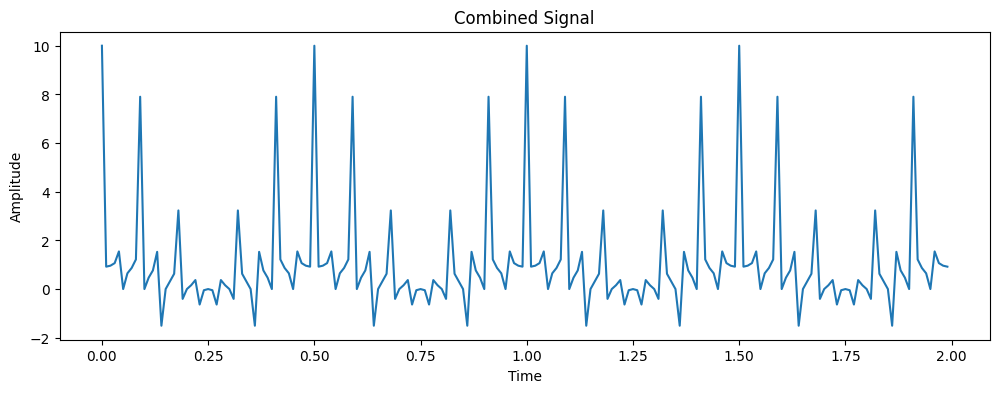

In [62]:
t_start = 0 # Start time of the signal
t_end = 2 # Final time of the signal

# Signal points
ten_signals = 0
for i in np.linspace(2, 200, 10):
    dt = 1 / 100 # Time between point in the signal
    time = np.arange(t_start, t_end, dt)  # Time vector
    print(i)
    ten_signals += np.cos(2 * np.pi * i * time)

# Creating figure
plt.figure(figsize=(12, 4))

# First graph: combined signal
plt.plot(time, ten_signals, '-')
plt.title('Combined Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

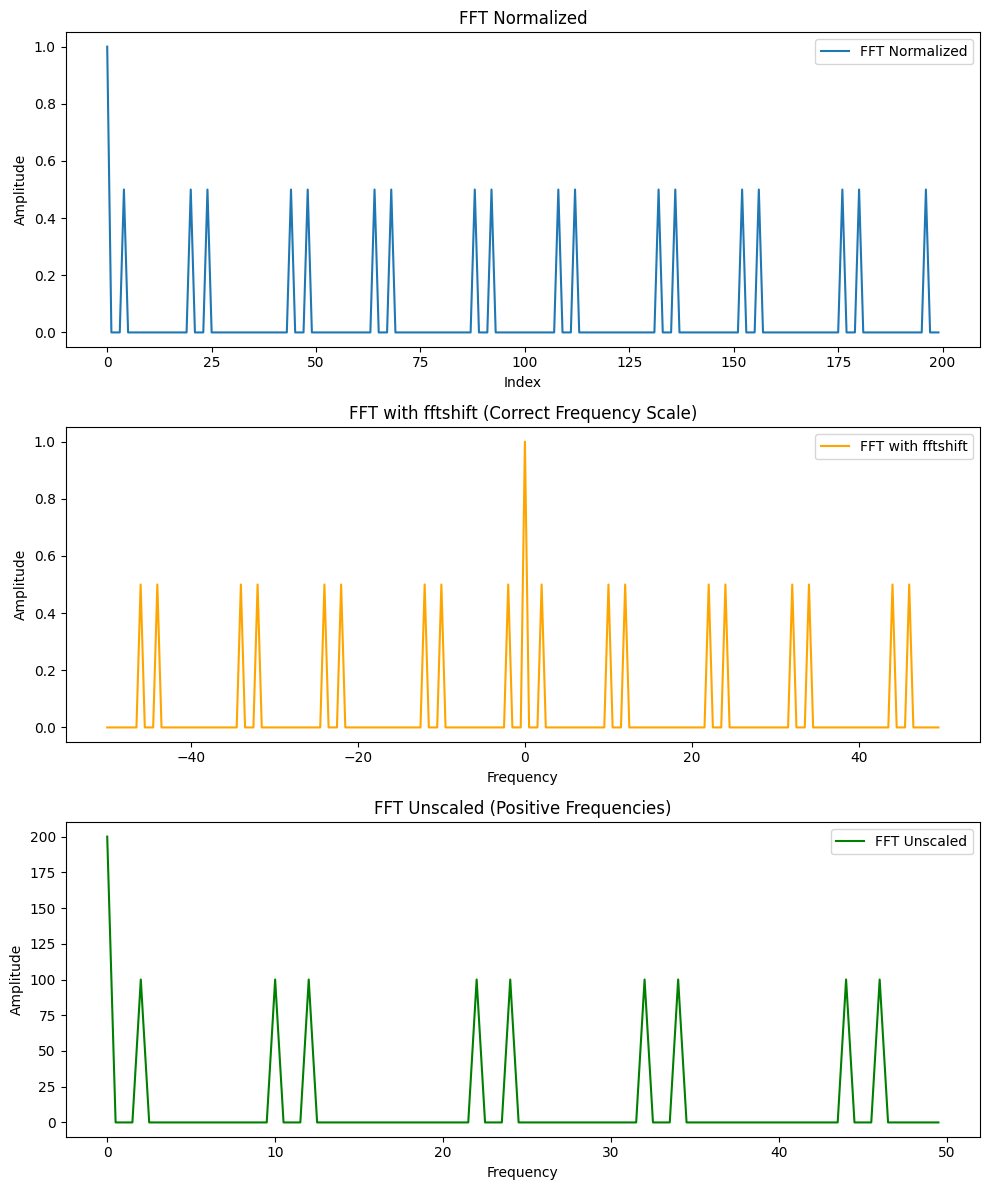

In [63]:
# Fourier Transform calculation
signal_FFT_ten = np.fft.fft(ten_signals / len(ten_signals))  # Normalization
signal_FFT2_ten = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ten_signals) / len(ten_signals)))

# Fourier Transform without normalization
signal_FFT_unscaled = np.fft.fft(ten_signals)
signal_FFT_unscaled = signal_FFT_unscaled[range(int(len(ten_signals) / 2))]  # Taking ONLY the positive frequencies
# Since the fft is symetrical, half of the values will be for the positive frequencies and the other half for the negative frequencies
# We only take the positive frequencies and their corresponding values

# Corresponding frequencies for unscaled FFT
indexes = np.arange(len(signal_FFT_unscaled))
time_duration = len(ten_signals) * dt
frequencies = indexes / time_duration

# Frequencies for fftshift (covering negative and positive)
freqs_shifted = np.fft.fftshift(np.fft.fftfreq(len(ten_signals), d=dt))

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# First graph: FFT with normalization
axs[0].plot(np.abs(signal_FFT_ten), label="FFT Normalized")
axs[0].set_title('FFT Normalized')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Second graph: FFT with fftshift and correct x-axis scaling
axs[1].plot(freqs_shifted, np.abs(signal_FFT2_ten), label="FFT with fftshift", color='orange')
axs[1].set_title('FFT with fftshift (Correct Frequency Scale)')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Third graph: FFT without normalization (positive frequencies)
axs[2].plot(frequencies, np.abs(signal_FFT_unscaled), label="FFT Unscaled", color='green')
axs[2].set_title('FFT Unscaled (Positive Frequencies)')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.tight_layout()
plt.show()


# Find the Fourier transform of a Gaussian packet, a square signal, and a triangular signal.

Created a function to make all this process easier, there is just needed to be changed the signal function

### Code to generate the 10 cosine signals added:
```python
signal = np.zeros_like(time)

# Generate 10 cosine waves with frequencies spaced between 2 Hz and 200 Hz
for i in np.linspace(2, 200, 10):  # Frequencies range from 2 Hz to 200 Hz
    signal += np.cos(2 * np.pi * i * time)  # Add each cosine wave to the signal
```


### Code to generate the square signal:
```python
from scipy.signal import square
signal = square(2 * np.pi * frequency * time)  # Square signal
```

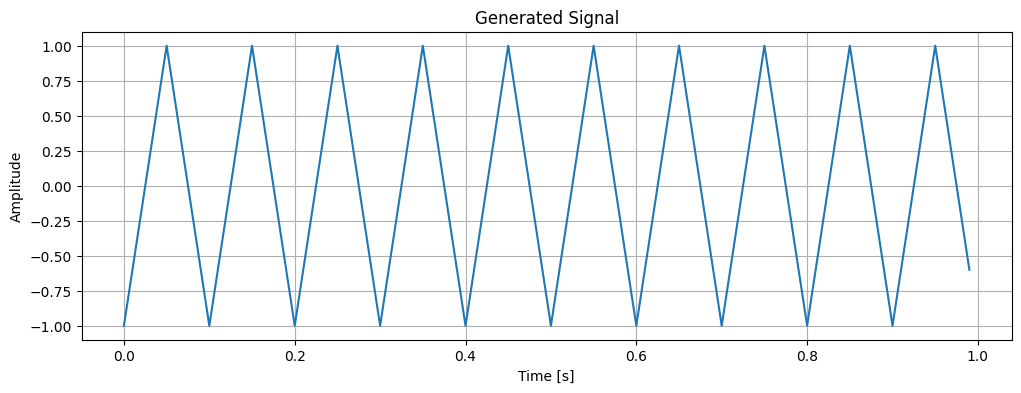

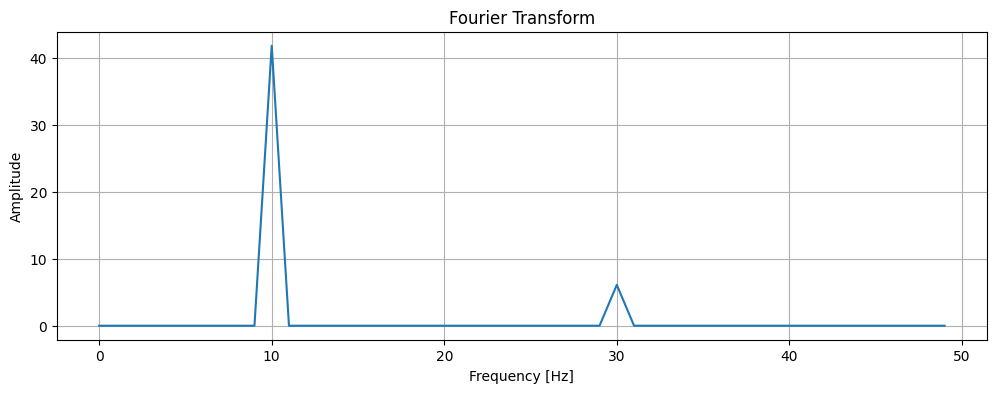

In [64]:
from scipy.signal import sawtooth

# Generate a simple triangular signal
def generate_signal(frequency=10, t_start=0, t_end=1, dt=1/100):
    """
    Generates a triangular signal using a specified frequency and time range.
    
    Parameters:
    frequency (float): Frequency of the triangular wave (default is 10 Hz).
    t_start (float): Start time of the signal (default is 0).
    t_end (float): End time of the signal (default is 1 second).
    dt (float): Time step or resolution (default is 1/100 seconds).
    
    Returns:
    signal (ndarray): Generated triangular wave signal.
    time (ndarray): Time vector corresponding to the signal.
    """
    # Create a time vector from t_start to t_end with intervals of dt
    time = np.arange(t_start, t_end, dt)
    
    # Generate a triangular wave signal using scipy's sawtooth function
    signal = sawtooth(2 * np.pi * frequency * time, width=0.5)
    
    return signal, time

# Plot the generated signal
def plot_signal(time, signal):
    """
    Plots the generated signal over time.
    
    Parameters:
    time (ndarray): Time vector corresponding to the signal.
    signal (ndarray): The signal values to be plotted.
    """
    plt.figure(figsize=(12, 4))
    
    # Plot the signal against time
    plt.plot(time, signal)
    plt.title('Generated Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)  # Add grid for better readability
    plt.show()

# Plot the Fourier Transform of the signal
def plot_fourier(signal, dt=1/100):
    """
    Computes and plots the Fourier Transform of the signal.
    
    Parameters:
    signal (ndarray): The signal values to be transformed and plotted.
    dt (float): Time step used in the signal, affecting the frequency resolution (default is 1/100 seconds).
    """
    # Compute the Fourier Transform of the signal
    fourier_transform = np.fft.fft(signal)
    
    # Compute the corresponding frequency values for the Fourier Transform
    frequencies = np.fft.fftfreq(len(signal), d=dt)
    
    # Plot only the positive frequencies, as the FFT output is symmetric
    plt.figure(figsize=(12, 4))
    plt.plot(frequencies[frequencies >= 0], np.abs(fourier_transform[frequencies >= 0]))
    
    plt.title('Fourier Transform')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)  # Add grid for better readability
    plt.show()

# Main function to generate the signal, plot the signal and its Fourier Transform
def main():
    """
    Main function to generate a triangular wave signal, plot it, and plot its Fourier Transform.
    """
    # Generate the triangular wave signal and its corresponding time vector
    signal, time = generate_signal()
    
    # Plot the generated signal over time
    plot_signal(time, signal)
    
    # Plot the Fourier Transform of the generated signal
    plot_fourier(signal)

# Call the main function to execute the script
main()